In [2]:
import numpy as np
import pandas as pd
from textblob import TextBlob

# Sentiment Analysis of UCI News Aggregator Dataset (NAD)

In [3]:
# Load News Aggregator Data
df = pd.read_csv("data/NewsAggregatorDataset/newsCorpora.csv", sep="\t", header=None)

# Remove columns we don't need (Keep only Headline, Publisher, Category, and Date)
df = df.drop([0, 2, 5, 6], axis=1)

# Rename columns
df.columns = ["Headline", "Publisher", "Category", "Date"]

# Reformat category values
df["Category"] = df["Category"].map({"b": "business", "t": "technology", "e": "entertainment", "m": "health"})

# Reformat date values (from unix to datetime)
df["Date"] = pd.to_datetime(df["Date"], unit="ms")

df.head()


,Headline,Publisher,Category,Date
0,"Fed official says weak data caused by weather,...",Los Angeles Times,business,2014-03-10 16:52:50.698
1,Fed's Charles Plosser sees high bar for change...,Livemint,business,2014-03-10 16:52:51.207
2,US open: Stocks fall after Fed official hints ...,IFA Magazine,business,2014-03-10 16:52:51.550
3,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,business,2014-03-10 16:52:51.793
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,business,2014-03-10 16:52:52.027


In [4]:
df[['Polarity', 'Subjectivity']] = pd.DataFrame(df.apply(lambda x: TextBlob(x['Headline']).sentiment, axis=1).tolist())
df

,Headline,Publisher,Category,Date,Polarity,Subjectivity
0,"Fed official says weak data caused by weather,...",Los Angeles Times,business,2014-03-10 16:52:50.698,-0.1125,0.5125
1,Fed's Charles Plosser sees high bar for change...,Livemint,business,2014-03-10 16:52:51.207,0.1600,0.5400
2,US open: Stocks fall after Fed official hints ...,IFA Magazine,business,2014-03-10 16:52:51.550,0.0000,0.5000
3,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,business,2014-03-10 16:52:51.793,-0.4000,0.7000
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,business,2014-03-10 16:52:52.027,-1.0000,1.0000
...,...,...,...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,WSHM-TV,health,2014-08-28 12:33:10.251,0.0000,0.0000
422415,Boy to have surgery on esophagus after battery...,WLWT Cincinnati,health,2014-08-28 12:33:10.508,0.0000,0.0000
422416,Child who swallowed battery to have reconstruc...,NewsNet5.com,health,2014-08-28 12:33:10.771,0.0000,0.0000
422417,Phoenix boy undergoes surgery to repair throat...,WFSB,health,2014-08-28 12:33:11.071,0.0000,0.0000


In [58]:
df.to_csv("data/NewsAggregatorDataset/NADSentiment.csv")

<Axes: xlabel='Polarity', ylabel='Subjectivity'>

/Users/athanzhang/opt/anaconda3/envs/Yilmaz_ML/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/athanzhang/opt/anaconda3/envs/Yilmaz_ML/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


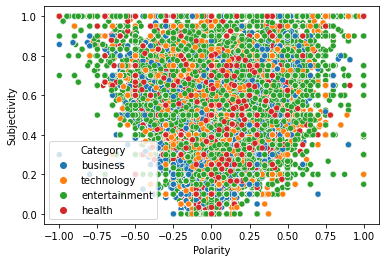

In [6]:
import seaborn as sns
# scatterplot
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Category", data=df["Category"])

# Sentiment Analysis of All The News Dataset (ATN)

In [113]:
# Load All The News Data
# 
df1 = pd.read_csv("data/AllTheNews/articles1.csv")
df2 = pd.read_csv("data/AllTheNews/articles2.csv")
df3 = pd.read_csv("data/AllTheNews/articles3.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove columns we don't need (Keep only Headline, Publisher, Category, and Date)
df = df.drop(df.columns[[0, 1, 4, 6, 7, 8, 9]], axis=1)

# # Rename columns
df.columns = ["Headline", "Publisher", "Date"]

# Drop rows where the Headline is not a string
df = df[df["Headline"].apply(lambda x: isinstance(x, str))]

df


,Headline,Publisher,Date
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31
1,Rift Between Officers and Residents as Killing...,New York Times,2017-06-19
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,2017-01-06
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,2017-04-10
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,2017-01-02
...,...,...,...
142565,An eavesdropping Uber driver saved his 16-year...,Washington Post,2016-12-30
142566,Plane carrying six people returning from a Cav...,Washington Post,2016-12-30
142567,After helping a fraction of homeowners expecte...,Washington Post,2016-12-30
142568,"Yes, this is real: Michigan just banned bannin...",Washington Post,2016-12-30


In [119]:
df[['Polarity', 'Subjectivity']] = pd.DataFrame(df.apply(lambda x: TextBlob(x['Headline']).sentiment, axis=1).tolist())
df

,Headline,Publisher,Date,Polarity,Subjectivity
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,0.318182,0.602273
1,Rift Between Officers and Residents as Killing...,New York Times,2017-06-19,0.136364,0.454545
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,2017-01-06,0.136364,0.454545
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,2017-04-10,-0.031818,0.477273
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,2017-01-02,0.136364,0.454545
...,...,...,...,...,...
142565,An eavesdropping Uber driver saved his 16-year...,Washington Post,2016-12-30,-0.050000,0.700000
142566,Plane carrying six people returning from a Cav...,Washington Post,2016-12-30,0.200000,0.300000
142567,After helping a fraction of homeowners expecte...,Washington Post,2016-12-30,0.000000,0.000000
142568,"Yes, this is real: Michigan just banned bannin...",Washington Post,2016-12-30,NaN,NaN


In [116]:
df.to_csv("data/AllTheNews/ATNsentiment.csv")